# Code and Physical Units

## GRMHD Units in terms of EOS 

$\newcommand{\rhoCode}{{\tilde{\rho}}}$

$\newcommand{\MCode}{{\tilde{M}}}$ $\newcommand{\rCode}{{\tilde{r}}}$ $\newcommand{\PCode}{{\tilde{P}}}$$\newcommand{\tCode}{{\tilde{t}}}$$\newcommand{\Mfid}{{M_{\rm fid}}}$$\newcommand{\MfidBar}{\bar{M}_{\rm fid}}$$\newcommand{\Mbar}{\bar{M}}$
$\newcommand{\rBar}{\bar{r}}$$\newcommand{\tBar}{\bar{t}}$
In GRMHD, we can set an equation of state of the form
\begin{equation}
P = K\rho^{1+1/n}
\end{equation}
Taking $c_s^2 = \partial P/\partial \rho = (1+1/n) K\rho^{1/n}$.  This gives for some fidicial $\rho_0$
\begin{equation}
c_{s,0}^2 = \left(1 + \frac 1 n\right)K\rho_0^{1/n}.
\end{equation}
Selecting $c_s^2 = c^2\left(1 + 1/n\right)$, we have
\begin{equation}
\rho_0 = \left(\frac {c^2}{K}\right)^n
\end{equation}
This is equivalent to setting the isothermal sound speed to $c$.  With this definition of $\rho_0$, we can write
\begin{equation}
P = \rho_0c^2\left(\frac{\rho}{\rho_0}\right)^{1+1/n}
\end{equation}
which allows us to define the dimensionless density $\rhoCode = \rho/\rho_0$ and dimensionless pressure $\PCode = P/\rho_0 c^2$
\begin{equation}
\PCode = \rhoCode^{1+1/n},
\end{equation}
where we adopt code units where $c=1$.  These dimensionless pressure and density are in $G=c=1$ units and can be used in GRMHD code including inclusion in the spacetime solver via $T_{\mu\nu}$.  Note that this sets $K=1$ in these units.

To find a dimensionless mass, $\MCode$, dimensionless distance, $\rCode$, and dimensionless time, $\tCode$, we note
$GM/rc^2$ is dimensionless
\begin{equation}
\frac{GM}{rc^2} = \frac{G\rho_0 r^2}{c^2} = \frac{Gc^{2n-2}}{K^n}r^2 \rightarrow \rCode = \frac{\sqrt{G}c^{n-1}}{K^{n/2}} r = \frac r {r_0},
\end{equation}
where $r_0 = K^{n/2}/\sqrt{G}c^{n-1}$.  Then
\begin{eqnarray}
\tCode &=& \frac{t}{t_0} = \frac{t}{r_0/c} = \frac{\sqrt{G}c^n}{K^{n/2}} t \\
\MCode &=& \frac{M}{M_0} = \frac{M}{\rho_0 r_0^3} = M\frac{K^n}{c^{2n}}\frac{G^{3/2}c^{3(n-1)}}{K^{3n/2}} = \frac{G^{3/2}c^{n-3}}{K^{n/2}} M,
\end{eqnarray}
Hence, we have 
\begin{eqnarray}
\rho_0 &=& \left(\frac{K}{c^2}\right)^n\\
r_0 &=& \frac{c^{n+1}}{\sqrt{G}K^{n/2}}\\
t_0 &=& \frac{c^{n}}{\sqrt{G}K^{n/2}}\\
M_0 &=& \frac{c^{n+3}}{G^{3/2}K^{n/2}}
\end{eqnarray}

## Mapping to SENR or any NR code

So we will need a $\Mfid$ which is define such that the (SENR) code units $\MfidBar = 1$ or in other words in SENR codes units: 
\begin{equation}
\Mbar = \frac{M}{\Mfid}
\end{equation}
In these units:
\begin{eqnarray}
\rBar &=& \frac{c^2}{G\Mfid} r\\
\tBar &=& \frac{c^3}{G\Mfid} t
\end{eqnarray}
At some level $\Mfid$ is arbitrary, so we can select $M_0 = \Mfid$.  In this case, this means that $\rBar = \rCode$, $\tBar = \tCode$, and $\Mbar = \MCode$, which fixes all the quantities. This comes at a cost the $\bar{M}_{\rm ADM}$ is not something nice like 1 or 2, but the choice is consistent.

### Zach's comments:

Sound speed $c_s$ is defined as

$$\frac{\partial P}{\partial \rho} = c_s^2,$$

so if we have a polytropic EOS, where

$$P = K \rho^{(1 + 1/n)},$$

then

\begin{align}
\frac{\partial P}{\partial \rho} &= c_s^2 \\
&= \left(1 + \frac{1}{n}\right) K \rho^{1/n}.
\end{align}

Let's adopt the notation 

$$[\rho] = \text{"the units of $\rho$"}$$

Using this notation and the fact that $n$ is dimensionless, the above expression implies

\begin{align}
\left[\rho^{1/n}\right] &= \left[\frac{c_s^2}{K}\right] \\
\implies \left[\rho\right] &= \left[\frac{c_s^2}{K}\right]^n
\end{align}

I think you found the inverse to be true.

# TOV Solver as illustration
The TOV equations are 
\begin{eqnarray}
\frac{dP}{dr} &=& -\mu\frac{GM}{r^2}\left(1 + \frac P {\mu c^2}\right)\left(1 + \frac {4\pi r^3 P}{Mc^2}\right)\left(1 - \frac {2GM}{rc^2}\right)^{-1}\\
\frac{dM}{dr} &=& 4\pi \mu r^2,
\end{eqnarray}
Here $M$ is the rest mass measure by a distant observer when we take $r\rightarrow \infty$.  Note this is different from the mass measured by integrating the density over the volume
\begin{equation}
M' = \int_0^{\infty} \frac{4\pi r^2\mu}{\sqrt{1 - \frac {2 GM}{rc^2}}} dr
\end{equation}
Additionally and annoyingly, $\mu = \rho h$ is the mass-energy density.  Alot of the literature uses $\rho$ for this, which is incredibly annoying. 

$\newcommand{\muCode}{{\tilde{\mu}}}$

In dimensionless units they are 
\begin{eqnarray}
\frac{d\PCode}{d\rCode} &=& -\frac {\left(\muCode + \PCode\right)\left(\MCode + 4\pi \rCode^3 \PCode\right)}{\rCode^2\left(1 - \frac {2\MCode}{\rCode}\right)}\\
\frac{d\MCode}{d\rCode} &=& 4\pi \muCode\rCode^2
\end{eqnarray}

At this point, we need to discuss how to numerically integrate these models.  First we pick a central baryonic mass density $\rhoCode_{0,c}$, then we compute a central pressure $\PCode_c$ and central mass-energy density $\muCode_c$.  At $\rCode=0$, we assume that $\muCode=\muCode_c$ is a constant and so 
\begin{eqnarray}
\frac{d\PCode}{d\rCode} &=& -\frac {\left(\muCode_c + \PCode_c\right)\left(\MCode(\rCode \ll 1) + 4\pi \rCode^3 \PCode_c\right)}{\rCode^2\left(1 - \frac {2\MCode(\rCode \ll 1)}{\rCode}\right)}\\
\frac{d\MCode}{d\rCode} &=& 4\pi \muCode_c\rCode^2 \rightarrow \MCode(\rCode \ll 1) = \frac{4\pi}{3} \muCode_c \rCode^3 
\end{eqnarray}

## Another dimensionless prescription

Let consider an alternative formulation where rather than setting $K=1$, we set the characteristic mass $\Mfid = M_0$.  In this case,
\begin{eqnarray}
r_0 &=& \frac{GM_0}{c^2} \\
t_0 &=& \frac{GM_0}{c^3} \\
\rho_0 &=& \frac{M_0}{r_0^3} = \frac{c^6}{G^3 M_0^2} = 6.17\times 10^{17}\left(\frac {M_0} {1 M_{\odot}}\right)^{-2}
\end{eqnarray}
In this case we can define $\rhoCode = \rho/\rho_0$, $\rCode = r/r_0$, $t_0 = t/t_0$. The only remaining thing to do is to define $\PCode$.  Lets define $P_0'$ to be the pressure in dimensionful units at $\rho_0$ (density in units of $1/M_0^2$):
\begin{equation}
P = P_0'\rhoCode^{1+1/n} \rightarrow P_0' = K\rho_0^{1+1/n},
\end{equation}
So defining $P_0 = \rho_0 c^2$, we have
\begin{equation}
\PCode = \frac{P}{P_0} = \frac{K\rho_0^{1/n}}{c^2}\rhoCode^{1+1/n} = \PCode_0\rhoCode^{1+1/n}
\end{equation}
If we take $K=1$ and define $\rho_0$ such that the $\PCode_0 = 1$, we recover the results above.
Finally for $\muCode = \rhoCode + \PCode/n$

## metric for TOV equation

The metric for the TOV equation (taken) from wikipedia is
\begin{equation}
ds^2 = - c^2 e^\nu dt^2 + \left(1 - \frac{2GM}{rc^2}\right)^{-1} dr^2 + r^2 d\Omega^2
\end{equation}
where $M$ is defined as above, the mass as measured by a distant observer.  The equation for $\nu$ is
\begin{equation}
\frac{d\nu}{dr} = -\left(\frac {2}{P +\mu}\right)\frac{dP}{dr}
\end{equation}
with the boundary condition
\begin{equation}
\exp(\nu) = \left(1-\frac {2Gm(R)}{Rc^2}\right)
\end{equation}

Lets write this in dimensionless units:
\begin{equation}
ds^2 = \exp(\nu) d\tCode^2 - \left(1 - \frac{2\MCode}{\rCode}\right)^{-1} d\rCode^2 + \rCode^2 d\Omega^2
\end{equation}
\begin{equation}
\frac{d\nu}{d\rCode} = -\left(\frac {2}{\PCode +\muCode}\right)\frac{d\PCode}{d\rCode}
\end{equation}
and BC:
\begin{equation}
\exp(\nu) = \left(1-\frac {2\MCode}{\rCode}\right)
\end{equation}

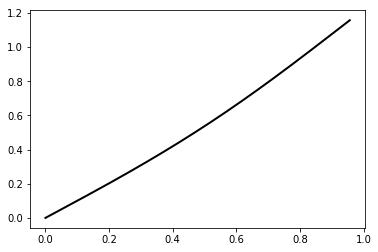

(0.9565681425227097, 0.14050303285288188, 6.808167219595284)


In [4]:
import numpy as np
import scipy.integrate as si
import math
import matplotlib.pyplot as pl
n = 1.
rho_central = 0.129285

P0 = 1. # ZACH NOTES: CHANGED FROM 100.
gamma = 1. + 1./n
gam1 = gamma - 1.

def pressure( rho) : 
    return P0*rho**gamma

def rhs( r, y) : 
# In \tilde units
#
    P = y[0]
    m   = y[1]
    nu  = y[2]
    rbar = y[3]
    rho = (P/P0)**(1./gamma)
    mu = rho + P/gam1
    dPdr = 0.
    drbardr = 0.
    if( r < 1e-4 or m <= 0.) : 
        m = 4*math.pi/3. * mu*r**3
        dPdr = -(mu + P)*(4.*math.pi/3.*r*mu + 4.*math.pi*r*P)/(1.-8.*math.pi*mu*r*r)
        drbardr = 1./(1. - 8.*math.pi*mu*r*r)**0.5
    else : 
        dPdr = -(mu + P)*(m + 4.*math.pi*r**3*P)/(r*r*(1.-2.*m/r))
        drbardr = 1./(1. - 2.*m/r)**0.5*rbar/r
    
    dmdr = 4.*math.pi*r*r*mu
    dnudr = -2./(P + mu)*dPdr
    return [dPdr, dmdr, dnudr, drbardr]

def integrateStar( P, showPlot = False, dumpData = False, compareFile="TOV/output_einstein.txt") :
    integrator = si.ode(rhs).set_integrator('dop853')
    y0 = [P, 0., 0., 0.]
    integrator.set_initial_value(y0,0.)
    dr = 1e-5
    P = y0[0]

    PArr = []
    rArr = []
    mArr = []
    nuArr = []
    rbarArr = []
    r = 0.

    while integrator.successful() and P > 1e-9*y0[0] : 
        P, m, nu, rbar = integrator.integrate(r + dr)
        r = integrator.t

#        print(r, P, m/r, rhs(r,[P,m, nu]) )
        dPdr, dmdr, dnudr, drbardr = rhs( r+dr, [P,m,nu,rbar])
        dr = 0.1*min(abs(P/dPdr), abs(m/dmdr))
        dr = min(dr, 1e-2)
        PArr.append(P)
        rArr.append(r)
        mArr.append(m)
        nuArr.append(nu)
        rbarArr.append( rbar)
        
        
    M = mArr[-1]
    R = rArr[-1]

    nuArr_np = np.array(nuArr)
    # Rescale solution to nu so that it satisfies BC: exp(nu(R))=exp(nutilde-nu(r=R)) * (1 - 2m(R)/R)
    #   Thus, nu(R) = (nutilde - nu(r=R)) + log(1 - 2*m(R)/R)
    nuArr_np = nuArr_np - nuArr_np[-1] + math.log(1.-2.*mArr[-1]/rArr[-1])

    rArrExtend_np = 10.**(np.arange(0.01,5.0,0.01))*rArr[-1]
    
    rArr.extend(rArrExtend_np)
    mArr.extend(rArrExtend_np*0. + M)
    PArr.extend(rArrExtend_np*0.)
    phiArr_np = np.append( np.exp(nuArr_np), 1. - 2.*M/rArrExtend_np)
    rbarArr.extend( 0.5*(np.sqrt(rArrExtend_np*rArrExtend_np-2.*M*rArrExtend_np) + rArrExtend_np - M))
    # Appending a Python array does what one would reasonably expect.
    #   Appending a numpy array allocates space for a new array with size+1,
    #   then copies the data over... over and over... super inefficient.
    mArr_np       = np.array(mArr)
    rArr_np       = np.array(rArr)
    PArr_np       = np.array(PArr)
    rbarArr_np    = np.array(rbarArr)
    rhoArr_np     = (PArr_np/P0)**(1./gamma)
    confFactor_np = rArr_np/rbarArr_np
    #confFactor_np = (1.0 / 12.0) * np.log(1.0/(1.0 - 2.0*mArr_np/rArr_np))
    Grr_np        = 1.0/(1.0 - 2.0*mArr_np/rArr_np)
    Gtt_np        = phiArr_np
    if( showPlot) :
        r,rbar,rprop,rho,m,phi = np.loadtxt( compareFile, usecols=[0,1,2,3,4,5],unpack=True)
        pl.plot(rArr_np[rArr_np < r[-1]], rbarArr_np[rArr_np < r[-1]],lw=2,color="black")
        #pl.plot(r, rbar, lw=2,color="red")
        
        pl.show()

    if( dumpData) : 
        np.savetxt( "output.txt", zip(rArr_np,rhoArr_np,PArr_np,mArr_np,phiArr_np,confFactor_np,rbarArr_np), fmt="%.15e")
        np.savetxt( "metric.txt", zip(rArr_np, Grr_np, Gtt_np),fmt="%.15e")
        #        np.savetxt( "output.txt", zip(rArr,rhoArr,mArr,phiArr), fmt="%12.7e")
        
#    return rArr[-1], mArr[-1], phiArr[-1]
    return R, M

mass = []
radius = []

r,m = integrateStar(pressure(rho_central), True, True)
print(r,m,r/m)

#for rho0 in np.arange(0.01, 1., 0.01):
#    r,m = integrateStar(pressure(rho0))
#    mass.append(m)
#    radius.append(r)

#print(mass, radius)
#pl.clf()
#pl.plot(radius,mass)
#pl.show()

## Convert metric to be in terms of ADM quantities

Above, the line element was written:
$$
ds^2 = - c^2 e^\nu dt^2 + \left(1 - \frac{2GM}{rc^2}\right)^{-1} dr^2 + r^2 d\Omega^2.
$$

In terms of $G=c=1$ units adopted by NRPy+, this becomes:
$$
ds^2 = - e^\nu dt^2 + \left(1 - \frac{2M}{r}\right)^{-1} dr^2 + r^2 d\Omega^2.
$$

The ADM 3+1 line element for this diagonal metric in spherical coordinates is given by:
$$
ds^2 = (-\alpha^2 + \beta_k \beta^k) dt^2 + \gamma_{rr} dr^2 + \gamma_{\theta\theta} d\theta^2+ \gamma_{\phi\phi} d\phi^2,
$$

from which we can immediately read off the ADM quantities:
\begin{align}
\alpha &= e^{\nu/2} \\
\beta^k &= 0 \\
\gamma_{rr} &= \left(1 - \frac{2M}{r}\right)^{-1}\\
\gamma_{\theta\theta} &= r^2 \\
\gamma_{\phi\phi} &= r^2 \sin^2 \theta \\
\end{align}

## Convert to cartesian coordinates

The above metric is given in spherical coordinates and we need everything in cartesian coordinates.  Given this the 
transformation to cartesian coordinates is 
\begin{equation}
g_{\mu\nu} = \Lambda^{\mu'}_{\mu} \Lambda^{\nu'}_{\nu} g_{\mu'\nu'},
\end{equation}
where $\Lambda^{\mu'}{\mu}$ is the Jacobian defined as
\begin{equation}
\Lambda^{\mu'}_{\mu} = \frac{\partial x'^{\mu'}}{\partial x^{\mu}}
\end{equation}
In this particular case $x'$ is in spherical coordinates and $x$ is in Cartesian coordinates.  

In [2]:
import sympy as sp
import NRPy_param_funcs as par
from outputC import *
import indexedexp as ixp
import reference_metric as rfm

# The ADM & BSSN formalisms only work in 3D; they are 3+1 decompositions of Einstein's equations.
#    To implement axisymmetry or spherical symmetry, simply set all spatial derivatives in
#    the relevant angular directions to zero; DO NOT SET DIM TO ANYTHING BUT 3.
# Step 0: Set spatial dimension (must be 3 for BSSN)
DIM = 3

# Set the desired *output* coordinate system to Cylindrical:
par.set_parval_from_str("reference_metric::CoordSystem","Cartesian")
rfm.reference_metric()

CoordType_in = "Spherical"

r_th_ph_or_Cart_xyz_of_xx = []
if CoordType_in == "Spherical":
    r_th_ph_or_Cart_xyz_of_xx = rfm.xxSph
elif CoordType_in == "Cartesian":
    r_th_ph_or_Cart_xyz_of_xx = rfm.xxCart

Jac_dUSphorCart_dDrfmUD = ixp.zerorank2()
for i in range(DIM):
    for j in range(DIM):
        Jac_dUSphorCart_dDrfmUD[i][j] = sp.diff(r_th_ph_or_Cart_xyz_of_xx[i],rfm.xx[j])

Jac_dUrfm_dDSphorCartUD, dummyDET = ixp.generic_matrix_inverter3x3(Jac_dUSphorCart_dDrfmUD)

betaU   = ixp.zerorank1()
gammaDD = ixp.zerorank2()
gammaSphDD = ixp.zerorank2()
grr, gthth, gphph = sp.symbols("grr gthth gphph")
gammaSphDD[0][0] = grr
gammaSphDD[1][1] = gthth
gammaSphDD[2][2] = gphph
betaSphU = ixp.zerorank1()
for i in range(DIM):
    for j in range(DIM):
        betaU[i] += Jac_dUrfm_dDSphorCartUD[i][j] * betaSphU[j]
        for k in range(DIM):
            for l in range(DIM):
                gammaDD[i][j] += Jac_dUSphorCart_dDrfmUD[k][i]*Jac_dUSphorCart_dDrfmUD[l][j] * gammaSphDD[k][l]

outputC([gammaDD[0][0], gammaDD[0][1], gammaDD[0][2], gammaDD[1][1], gammaDD[1][2], gammaDD[2][2]], 
              ["mi.gamDDxx", "mi.gamDDxy", "mi.gamDDxz", "mi.gamDDyy", "mi.gamDDyz","mi.gamDDzz"], filename="NRPY+spherical_to_cartesian_metric.h")

Wrote to file "NRPY+spherical_to_cartesian_metric.h"
